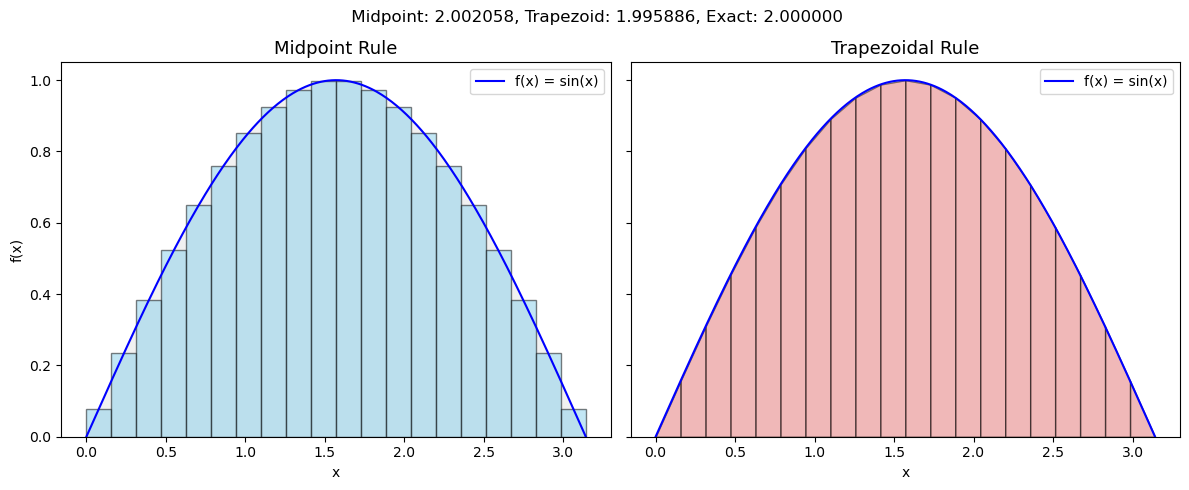

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


def numerical_integration(f, a, b, n, method):  
    h = (b - a) / n
    total = 0.0

    if method == 'midpoint':
        for i in range(n):
            x_mid = a + (i + 0.5)*h
            total += f(x_mid)
        return total * h

    elif method == 'trapezoid':
        total = f(a) + f(b)
        for i in range(1, n):
            x = a + i*h
            total += 2 * f(x)
        sum_trap = (h/2)*total
        return sum_trap


sigma = 1e-3
f = lambda x: np.sin(x)
#f = lambda x: x**2
#f = lambda x: np.exp(-x**2) * np.cos(5*x)
#f = lambda x: np.exp(-x**2) 
#f = lambda x: np.cos(5*x)
#f = lambda x: np.exp(-x) * np.sin(10*x)

'''def f(x):
    return np.cos(5 * x)'''

a, b = 0, np.pi
n = 20

# Compute results using the function
midpoint_result = numerical_integration(f, a, b, n, method='midpoint')
trapezoid_result = numerical_integration(f, a, b, n, method='trapezoid')
exact_result = quad(f, a, b)[0]


x = np.linspace(a, b, 400)
y = f(x)

x_nodes = np.linspace(a, b, n + 1)
h = (b - a) / n

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# -------------------------------------------------------------
# (a) Midpoint Rule Visualization
# -------------------------------------------------------------
x_mid = a + (np.arange(n) + 0.5)*h
y_mid = f(x_mid)

axes[0].plot(x, y, 'b', label='f(x) = sin(x)')
axes[0].fill_between(x, y, color='lightgray', alpha=0.3)

for i in range(n):
    axes[0].bar(x_mid[i], y_mid[i], width=h, align='center',
                alpha=0.5, color='skyblue', edgecolor='k')

axes[0].set_title('Midpoint Rule', fontsize=13)
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].legend()

# -------------------------------------------------------------
# (b) Trapezoidal Rule Visualization
# -------------------------------------------------------------
y_nodes = f(x_nodes)

axes[1].plot(x, y, 'b', label='f(x) = sin(x)')
axes[1].fill_between(x, y, color='lightgray', alpha=0.3)

for i in range(n):
    xs = [x_nodes[i], x_nodes[i+1]]
    ys = [y_nodes[i], y_nodes[i+1]]
    axes[1].fill_between(xs, ys, color='lightcoral', alpha=0.5, edgecolor='k')

axes[1].set_title('Trapezoidal Rule', fontsize=13)
axes[1].set_xlabel('x')
axes[1].legend()

fig.suptitle(
    f" Midpoint: {midpoint_result:.6f}, "
    f"Trapezoid: {trapezoid_result:.6f}, Exact: {exact_result:.6f}",
    fontsize=12, y=0.97
)

plt.tight_layout()
plt.show()
